In [81]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from pandas.plotting import register_matplotlib_converters
from pandas.plotting import lag_plot
from pandas import datetime
from statsmodels.tsa.arima_model import ARIMA
from sklearn.metrics import mean_squared_error
from pandas import datetime
register_matplotlib_converters()
import os

os.chdir(r"C:\Users\huyue\OneDrive\Desktop\New folder\Final_Portfolio_Data") 

<ipython-input-81-a0cd4bc06542>:8: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime
<ipython-input-81-a0cd4bc06542>:11: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


In [82]:
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage
from pypfopt import expected_returns
from pypfopt.efficient_frontier import EfficientFrontier

In [ ]:
#pip install PyPortfolioOpt

In [83]:
df1 = pd.read_csv('totalAGG.csv', parse_dates = [0], index_col = [0])
df2 = pd.read_csv('totalDBC.csv', parse_dates = [0], index_col = [0])
df3 = pd.read_csv('totalVIX.csv', parse_dates = [0], index_col = [0])
df4 = pd.read_csv('totalVTI.csv', parse_dates = [0], index_col = [0])
df1.head()

,y_true,Arima,LSTM,ANN,SVR,RF,Arima + LSTM,Arima + ANN,Arima + SVR,Arima + RF
Date,,,,,,,,,,
2018-01-01,109.040001,109.401619,109.232229,109.227137,109.329832,109.585885,109.345484,109.485514,109.399198,109.305787
2018-01-08,108.739998,109.288808,109.110394,109.168001,109.196613,109.246608,109.150927,108.901882,109.228959,109.152844
2018-01-15,108.180000,109.288808,108.836703,108.633961,109.005003,108.838129,109.152933,109.056811,109.151885,109.160901
2018-01-22,108.370003,109.288808,108.363606,108.505565,108.631674,108.497227,109.486205,109.267983,109.013294,109.160580
2018-01-29,107.199997,109.288808,108.320457,108.570302,108.508273,108.313207,109.719524,108.627426,109.093992,109.146632


In [84]:
AGG_y = df1['y_true']
DBC_y = df2['y_true']
VIX_y = df3['y_true']
VTI_y = df4['y_true']
data_y = pd.DataFrame(list(zip(AGG_y, DBC_y, VIX_y, VTI_y)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_y.index)
print(data_y)

                   AGG        DBC        VIX         VTI
Date                                                    
2018-01-01  109.040001  16.709999   9.220000  140.369995
2018-01-08  108.739998  16.969999  10.160000  142.750000
2018-01-15  108.180000  16.879999  11.270000  143.919998
2018-01-22  108.370003  17.250000  11.080000  146.860001
2018-01-29  107.199997  16.990000  17.309999  141.300003
...                ...        ...        ...         ...
2021-01-25  117.309998  15.190000  33.090000  193.990005
2021-02-01  116.709999  15.870000  20.870001  204.110001
2021-02-08  116.580002  16.320000  19.969999  207.490005
2021-02-15  115.839996  16.520000  22.049999  205.970001
2021-02-22  115.339996  16.730000  27.950001  200.080002

[165 rows x 4 columns]


In [85]:
AGG_arima = df1['Arima']
DBC_arima = df2['Arima']
VIX_arima = df3['Arima']
VTI_arima = df4['Arima']
data_arima = pd.DataFrame(list(zip(AGG_arima, DBC_arima, VIX_arima, VTI_arima)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_arima.index)
print(data_arima)

                   AGG        DBC        VIX         VTI
Date                                                    
2018-01-01  109.401619  16.610001  11.162410  137.250000
2018-01-08  109.288808  16.610001  11.069199  137.250000
2018-01-15  109.288808  16.610001  11.017751  137.250000
2018-01-22  109.288808  16.610001  11.017751  137.250000
2018-01-29  109.288808  16.610001  11.017751  137.250000
...                ...        ...        ...         ...
2021-01-25  117.283720  15.090000  22.096532  200.889999
2021-02-01  117.343401  15.090000  21.869007  200.889999
2021-02-08  117.343401  15.090000  21.999041  200.889999
2021-02-15  117.343401  15.090000  21.999041  200.889999
2021-02-22  117.343401  15.090000  21.999041  200.889999

[165 rows x 4 columns]


In [86]:
AGG_ari_LSTM = df1['Arima + LSTM']
DBC_ari_LSTM = df2['Arima + LSTM']
VIX_ari_LSTM = df3['Arima + LSTM']
VTI_ari_LSTM = df4['Arima + LSTM']
data_ari_LSTM = pd.DataFrame(list(zip(AGG_ari_LSTM, DBC_ari_LSTM, VIX_ari_LSTM, VTI_ari_LSTM)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_arima.index)
print(data_ari_LSTM)

                   AGG        DBC        VIX         VTI
Date                                                    
2018-01-01  109.345484  16.994634  10.148132  140.359152
2018-01-08  109.150927  16.734572  10.308322  139.914491
2018-01-15  109.152933  17.057118  10.472653  139.883423
2018-01-22  109.486205  16.941696  10.493515  140.311456
2018-01-29  109.719524  17.007356  10.116880  141.573085
...                ...        ...        ...         ...
2021-01-25  116.817855  15.818166  21.289715  201.742537
2021-02-01  117.013899  15.492979  37.725527  193.120934
2021-02-08  117.269900  15.650588  25.154921  196.551613
2021-02-15  117.164279  15.948912  21.987188  207.455910
2021-02-22  117.604890  15.026686  24.978929  215.180239

[165 rows x 4 columns]


In [104]:
# baseline
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history = data_y[i:i+timesteps]
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
       # print(w0)
        w0 = w0.T
       # print(w0)
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
       # print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret00 = ret.add(1).cumprod().subtract(1).multiply(100)

#print(ret00)

<ipython-input-104-f6f00457ff6c>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-104-f6f00457ff6c>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [93]:
AGG_svr = df1['SVR']
DBC_svr = df2['SVR']
VIX_svr = df3['SVR']
VTI_svr = df4['SVR']
data_svr = pd.DataFrame(list(zip(AGG_svr, DBC_svr, VIX_svr, VTI_svr)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_svr.index)
print(data_svr)


                   AGG        DBC        VIX         VTI
Date                                                    
2018-01-01  109.329832  16.371936  10.903424  136.543263
2018-01-08  109.196613  16.429920   9.991940  137.874943
2018-01-15  109.005003  16.548896  10.541730  139.443200
2018-01-22  108.631674  16.514156  11.182753  140.666548
2018-01-29  108.508273  16.748682  10.887807  142.224436
...                ...        ...        ...         ...
2021-01-25  117.530051  15.172755  21.288047  196.219052
2021-02-01  117.449593  15.242537  30.076821  193.131110
2021-02-08  117.140880  15.719244  22.391918  197.157843
2021-02-15  117.031545  16.117180  18.876409  201.188322
2021-02-22  116.512032  16.388879  20.989956  208.638974

[165 rows x 4 columns]


In [105]:
# SVR
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_svr.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret33 = ret.add(1).cumprod().subtract(1).multiply(100)

print(ret33)

<ipython-input-105-05a3a0f6ff19>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-105-05a3a0f6ff19>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


2018-01-08      3.655092
2018-01-15      6.747423
2018-01-22      7.874300
2018-01-29     20.311251
2018-02-05     36.121945
                 ...    
2020-10-12    327.476966
2020-10-19    327.426788
2020-10-26    369.596315
2020-11-02    331.486819
2020-11-09    334.910240
Length: 140, dtype: float64


In [106]:
# Arima
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_arima.iloc[i + timesteps - 1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret11 = ret.add(1).cumprod().subtract(1).multiply(100)



<ipython-input-106-458035274e6a>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-106-458035274e6a>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [96]:
AGG_lstm = df1['LSTM']
DBC_lstm = df2['LSTM']
VIX_lstm = df3['LSTM']
VTI_lstm = df4['LSTM']
data_lstm = pd.DataFrame(list(zip(AGG_lstm, DBC_lstm, VIX_lstm, VTI_lstm)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_lstm.index)
print(data_lstm)

                   AGG        DBC        VIX         VTI
Date                                                    
2018-01-01  109.232229  16.285228  10.365080  136.344408
2018-01-08  109.110394  16.455189   9.084466  136.444763
2018-01-15  108.836703  16.604699   9.810340  136.625000
2018-01-22  108.363606  16.594837  10.534884  136.831197
2018-01-29  108.320457  16.790787  10.543188  136.351688
...                ...        ...        ...         ...
2021-01-25  117.583161  14.984908  21.318455  191.714659
2021-02-01  117.590886  15.155367  31.413534  188.916669
2021-02-08  117.210500  15.820635  21.633265  192.958963
2021-02-15  117.096313  16.242252  20.369828  194.980269
2021-02-22  116.478480  16.537817  21.797453  200.696124

[165 rows x 4 columns]


In [107]:
# LSTM
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_lstm.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret44 = ret.add(1).cumprod().subtract(1).multiply(100)



<ipython-input-107-e4b357da7f7f>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-107-e4b357da7f7f>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [108]:
# Arima + LSTM
from pypfopt.expected_returns import mean_historical_return
from pypfopt.risk_models import CovarianceShrinkage

port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_ari_LSTM.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret22 = ret.add(1).cumprod().subtract(1).multiply(100)



<ipython-input-108-7c165573aaff>:7: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-108-7c165573aaff>:8: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [109]:
# RF

AGG_rf = df1['RF']
DBC_rf = df2['RF']
VIX_rf = df3['RF']
VTI_rf = df4['RF']
data_rf = pd.DataFrame(list(zip(AGG_rf, DBC_rf, VIX_rf, VTI_rf)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_rf.index)



port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_rf.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret55 = ret.add(1).cumprod().subtract(1).multiply(100)

<ipython-input-109-d553b6a08e85>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-109-d553b6a08e85>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [110]:
# ANN

AGG_ANN = df1['ANN']
DBC_ANN = df2['ANN']
VIX_ANN = df3['ANN']
VTI_ANN = df4['ANN']
data_ANN = pd.DataFrame(list(zip(AGG_ANN, DBC_ANN, VIX_ANN, VTI_ANN)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_ANN.index)



port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_ANN.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret66 = ret.add(1).cumprod().subtract(1).multiply(100)

<ipython-input-110-136ef4c1f376>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-110-136ef4c1f376>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [111]:
# Arima + ANN

AGG_ari_ANN = df1['Arima + ANN']
DBC_ari_ANN = df2['Arima + ANN']
VIX_ari_ANN = df3['Arima + ANN']
VTI_ari_ANN = df4['Arima + ANN']
data_ari_ANN = pd.DataFrame(list(zip(AGG_ari_ANN, DBC_ari_ANN, VIX_ari_ANN, VTI_ari_ANN)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_ari_ANN.index)



port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_ari_ANN.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret77 = ret.add(1).cumprod().subtract(1).multiply(100)

<ipython-input-111-399859b85b81>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-111-399859b85b81>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [112]:
# Arima + SVR

AGG_ari_svr = df1['Arima + SVR']
DBC_ari_svr = df2['Arima + SVR']
VIX_ari_svr = df3['Arima + SVR']
VTI_ari_svr = df4['Arima + SVR']
data_ari_svr = pd.DataFrame(list(zip(AGG_ari_svr, DBC_ari_svr, VIX_ari_svr, VTI_ari_svr)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_ari_svr.index)



port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_ari_svr.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret88 = ret.add(1).cumprod().subtract(1).multiply(100)

<ipython-input-112-fcd57b270c6f>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-112-fcd57b270c6f>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [114]:
# Arima + RF

AGG_ari_rf = df1['Arima + RF']
DBC_ari_rf = df2['Arima + RF']
VIX_ari_rf = df3['Arima + RF']
VTI_ari_rf = df4['Arima + RF']
data_ari_rf = pd.DataFrame(list(zip(AGG_ari_rf, DBC_ari_rf, VIX_ari_rf, VTI_ari_rf)), 
                          columns=['AGG', 'DBC', 'VIX', 'VTI'], 
                          index = AGG_ari_rf.index)



port_ret = []
ret = []
port_ret = pd.Series() 
ret = pd.Series() 
timesteps = 15

for i in range(0,len(data_y)-timesteps, timesteps):
    history1 = data_y[i:i + timesteps - 1]
    history2 = pd.DataFrame(data_ari_rf.iloc[i + timesteps-1]).T
    history = pd.concat([history1, history2])
    
    # Calculate expected returns and sample covariance
    mu = expected_returns.mean_historical_return(history)
    S = CovarianceShrinkage(history).ledoit_wolf()
    # Optimize for maximal Sharpe ratio
    ef = EfficientFrontier(mu, S)
    weights = ef.max_sharpe()
    
    if i==0:
        w0 = pd.DataFrame(weights.values())
        w0 = w0.T
        w0.rename(columns={0:'AGG',1:'DBC',2:'VIX',3:'VTI'},inplace=True)
#         print(w0)
        
    else: 
        w = list(weights.values())
        w0.loc[len(w0)] = w
    
    ret_data = history.pct_change()[1:]
    ret_data1 = ret_data.dropna()
    weighted_returns = (weights * ret_data1)*100
    port_ret0 = weighted_returns.sum(axis=1)
    port_ret = pd.concat([port_ret, port_ret0])
    weights1 = list(weights.values())
    ret0 = ret_data1.dot(weights1)
    
    if i==0:
        ret = ret0
    else:  
        ret = pd.concat([ret, ret0])
        
    

# cumulative return
ret99 = ret.add(1).cumprod().subtract(1).multiply(100)

<ipython-input-114-f5ae1ccbf3b1>:15: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  port_ret = pd.Series()
<ipython-input-114-f5ae1ccbf3b1>:16: DeprecationWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  ret = pd.Series()


In [120]:

data_ret = pd.DataFrame(list(zip(ret00,ret11,ret33,ret44,ret55,ret66,ret22,ret77,ret88,ret99)), 
                          columns=['y_true', 'Arima', 'SVR', 'LSTM','RF','ANN','Arima + LSTM','Arima + ANN','Arima + SVR','Arima + RF'], 
                          index = ret00.index)
data_ret.to_csv('total_return.csv')



In [11]:
# w0.index = data_y[5:-1].index
# w0
w0.to_csv('weights.csv')
port_ret.to_csv('port_ret.csv')
ret00.to_csv('ret.csv')

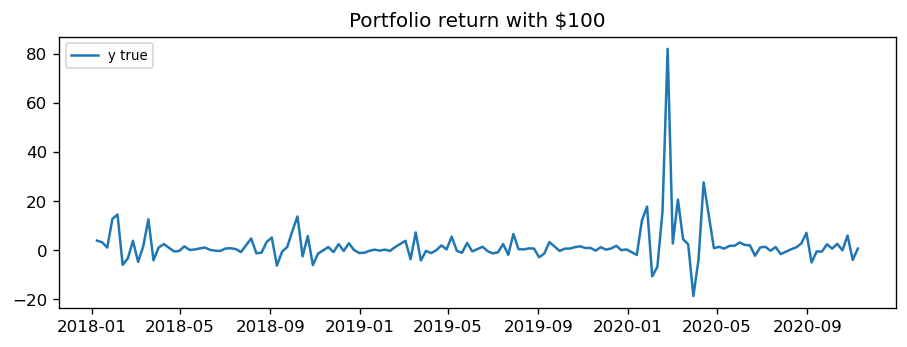

In [115]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})

plt.plot(port_ret, label='y true')

plt.legend(loc='upper left', fontsize=8)
plt.title('Portfolio return with $100')
plt.show()

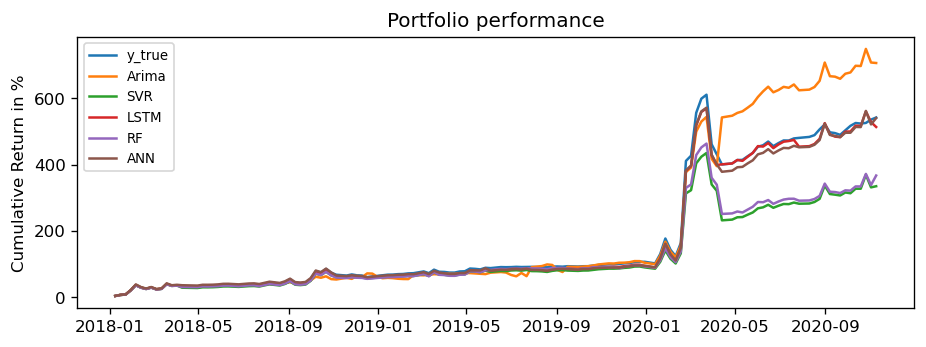

In [116]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plt.plot(ret00, label='y_true')
plt.plot(ret11, label='Arima')
plt.plot(ret33, label='SVR')
plt.plot(ret44, label='LSTM')
plt.plot(ret55, label='RF')
plt.plot(ret66, label='ANN')
plt.ylabel('Cumulative Return in %')
plt.legend(loc='upper left', fontsize=8)
plt.title('Portfolio performance')

plt.show()

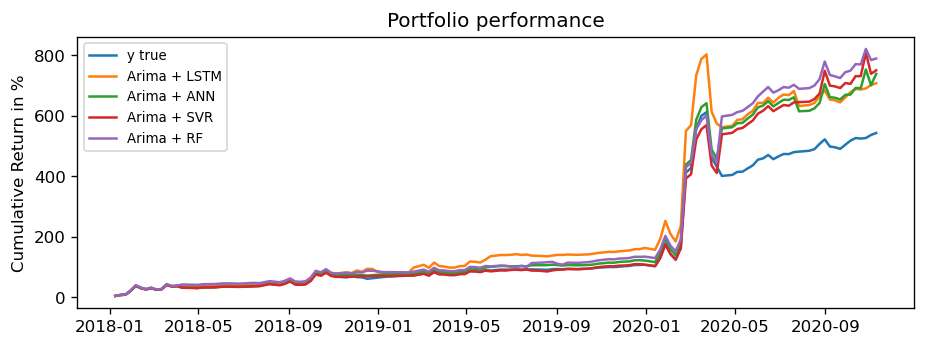

In [121]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plt.plot(ret00, label='y true')

plt.plot(ret22, label='Arima + LSTM')
plt.plot(ret77, label='Arima + ANN')
plt.plot(ret88, label='Arima + SVR')
plt.plot(ret99, label='Arima + RF')

plt.ylabel('Cumulative Return in %')
plt.legend(loc='upper left', fontsize=8)
plt.title('Portfolio performance')
plt.show()

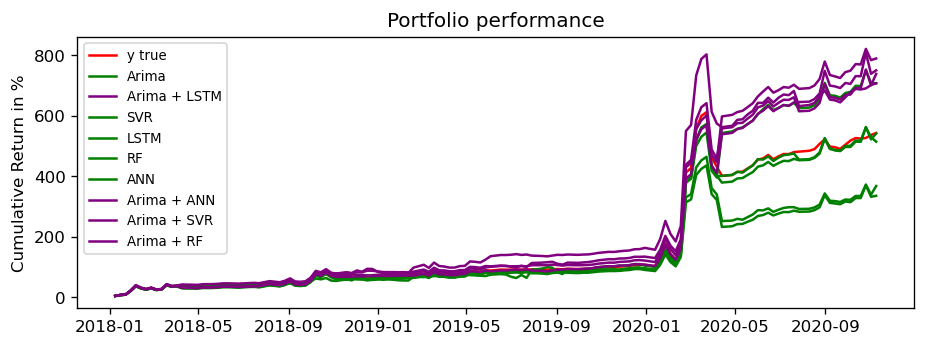

In [122]:
plt.rcParams.update({'figure.figsize':(9,3), 'figure.dpi':120})
plt.plot(ret00, label='y true',color="red")
plt.plot(ret11, label='Arima',color="green")
plt.plot(ret22, label='Arima + LSTM',color="purple")
plt.plot(ret33, label='SVR',color="green")
plt.plot(ret44, label='LSTM',color="green")
plt.plot(ret55, label='RF',color="green")
plt.plot(ret66, label='ANN',color="green")
plt.plot(ret77, label='Arima + ANN',color="purple")
plt.plot(ret88, label='Arima + SVR',color="purple")
plt.plot(ret99, label='Arima + RF',color="purple")
plt.ylabel('Cumulative Return in %')
plt.legend(loc='upper left', fontsize=8)
plt.title('Portfolio performance')
plt.show()

In [26]:
# history1 = data_y[0:4]
# history2 = data_arima[5]
# weights = [0.2,0.2,0.3,0.3]
# ret_data = history.pct_change()[1:]
# ret_data1 = ret_data.dropna()
# weighted_returns = (weights * ret_data1)*100
# port_ret0 = weighted_returns.sum(axis=1)
# # port_ret = pd.concat([port_ret, port_ret0])
# ret0 = ret_data1.dot(weights).add(1).cumprod().subtract(1).multiply(100)

In [56]:
# history1 = data_y[0:4]
# history2 = pd.DataFrame(data_arima.iloc[4]).T
# history = pd.concat([history1, history2])


In [ ]:
plt.plot()